<a href="https://colab.research.google.com/github/AntoineSfeir/AntoineSfeir.github.io/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override() 
from pandas_datareader import data as pdr
import requests #for HTTP Request
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

begin = '2010-01-01'

#df = pdr.get_data_yahoo('PG', start=begin)
df = pdr.get_data_yahoo('AAPL', begin)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [ ]:

df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-09,153.559998,154.539993,150.229996,150.589996,150.589996,53833600
2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400
2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100
2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77090100


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


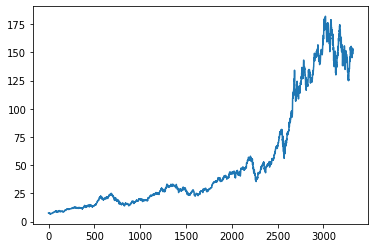

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3317,153.559998,154.539993,150.229996,150.589996,53833600
3318,150.210007,150.940002,147.610001,148.500000,68524400
3319,147.809998,153.139999,147.699997,150.470001,84457100
3320,151.279999,153.399994,150.100006,152.589996,73695900


In [ ]:
#Rolling average for 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3317    143.573200
3318    143.674399
3319    143.754999
3320    143.843399
3321    143.934699
Name: Close, Length: 3322, dtype: float64

In [ ]:
#Rolling average for 200 days
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3317    147.42685
3318    147.45380
3319    147.50435
3320    147.56470
3321    147.61075
Name: Close, Length: 3322, dtype: float64

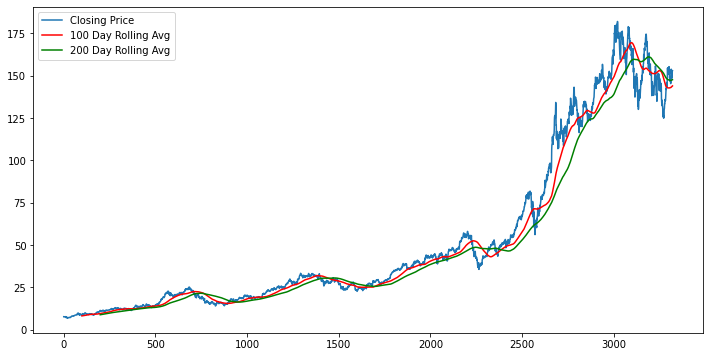

In [ ]:
#Rolling averages compared with actual 
plt.figure(figsize=(12,6))
plt.plot(df.Close,label='Closing Price')
plt.plot(ma100, 'r', label='100 Day Rolling Avg') #100 day rolling average is the red
plt.plot(ma200, 'g', label='200 Day Rolling Avg') #200 day rolling average is the grean
plt.legend()
plt.show()




In [ ]:
df.shape

(3322, 5)

Splitting Data into Training and Testing



In [ ]:

# Training data frame will consist of 70% of the total values
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

# Testing data from will consist of the last 30% of the total values
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2325, 1)
(997, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
2325,47.810001
2326,48.505001
2327,48.837502
2328,48.922501
2329,49.250000


Scale the stockprices to a value inbetween 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
#Applies scaler to the training data and then putting it into an array
data_training_array = scaler.fit_transform(data_training)

data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.78693695],
       [0.78815864],
       [0.79416934]])

# Example of the logic behind the traing data

                Day| 1  2  3  4  5  6  7   8  9  10 | 11

        Stock price| 34 35 33 40 39 38 37  42 44 38 |?=43

        days = steps

The price prediction for the 11th step depends on prices from the 10 steps before. The values for the 10 steps will be the x_train and the 11th step will be the y_train. So, we will have our known values in x_train and our predicted values in y_train




In [ ]:
x_train=[]
y_train=[]

for i in range(100, data_training.shape[0]):
  x_train.append(data_training_array[i - 100:i])
  y_train.append(data_training_array[i, 0])

# converts both arrays to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# LSTM Model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential() 

# layer 1
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape =(x_train.shape[1], 1))) # we are only using 1 access the closing column
model.add(Dropout(0.2))

# layer 2
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True)) 
model.add(Dropout(0.3))

# layer 3
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True)) 
model.add(Dropout(0.4))

# layer 4
model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

# connects all the layer, our unit is only 1 because we are just predicting
# closing price
model.add(Dense(units = 1))

#Summary of Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50) # will train 50 times

Epoch 1/50
70/70 [==============================] - 32s 366ms/step - loss: 0.0313
Epoch 2/50
70/70 [==============================] - 27s 385ms/step - loss: 0.0070
Epoch 3/50
70/70 [==============================] - 26s 374ms/step - loss: 0.0064
Epoch 4/50
70/70 [==============================] - 26s 373ms/step - loss: 0.0055
Epoch 5/50
70/70 [==============================] - 29s 414ms/step - loss: 0.0054
Epoch 6/50
70/70 [==============================] - 31s 439ms/step - loss: 0.0052
Epoch 7/50
70/70 [==============================] - 29s 412ms/step - loss: 0.0049
Epoch 8/50
70/70 [==============================] - 26s 370ms/step - loss: 0.0045
Epoch 9/50
70/70 [==============================] - 26s 367ms/step - loss: 0.0042
Epoch 10/50
70/70 [==============================] - 26s 369ms/step - loss: 0.0041
Epoch 11/50
70/70 [==============================] - 26s 370ms/step - loss: 0.0041
Epoch 12/50
70/70 [==============================] - 25s 360ms/step - loss: 0.0039
Epoch 13/50
7

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
2325,47.810001
2326,48.505001
2327,48.837502
2328,48.922501
2329,49.250000


In [ ]:
data_training.tail()

,Close
2320,47.185001
2321,46.697498
2322,47.117500
2323,47.180000
2324,47.487499


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-44-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [ ]:
# testing data
final_df.head()

,Close
0,51.869999
1,50.397499
2,50.942501
3,52.487499
4,52.122501


In [ ]:
input_data = scaler.transform(final_df) # scales the data (0,1)

input_data

array([[0.1114449 ],
       [0.10139113],
       [0.10511224],
       ...,
       [0.78465481],
       [0.79912947],
       [0.80186061]])

In [ ]:
input_data.shape

(1097, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(997, 100, 1)
(997,)


# Making predictions

In [ ]:
y_predicted = model.predict(x_test)

32/32 [==============================] - 3s 94ms/step


In [ ]:
y_predicted.shape

(997, 1)

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

array([0.00682769])

In [ ]:
scale_factor = 1/0.00682769

y_predicted = y_predicted * scale_factor

y_test = y_test * scale_factor


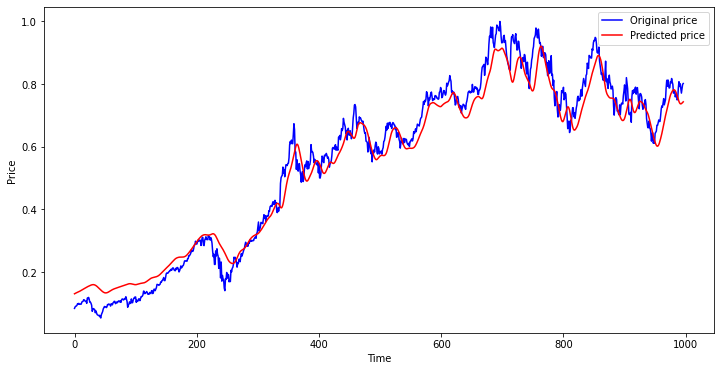

In [ ]:


plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()